Feature shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']
Test Accuracy: 0.9333

Confusion Matrix (raw counts):
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


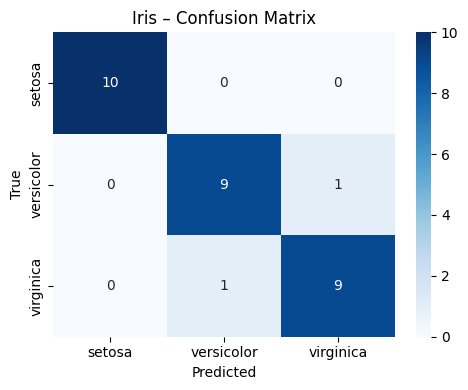

In [1]:
# Task 4
# -----------------------------------------
# Step 0: Imports
# -----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # only for a nicer confusion matrix plot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------
# Step 1: Load the Iris dataset
# -----------------------------------------
iris = load_iris()
X = iris.data          # features: sepal length/width, petal length/width
y = iris.target        # labels: 0=setosa, 1=versicolor, 2=virginica
class_names = iris.target_names

print("Feature shape:", X.shape)
print("Classes:", class_names)

# -----------------------------------------
# Step 2: Train/Test split
# -----------------------------------------
# Keep a hold-out test set for unbiased evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------
# Step 3: Build a pipeline (scaling + classifier)
# -----------------------------------------
# Logistic Regression is a solid baseline for multi-class classification.
# StandardScaler helps many models by normalizing feature scales.
model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, multi_class="auto"))
])

# -----------------------------------------
# Step 4: Train (fit) the model
# -----------------------------------------
model.fit(X_train, y_train)

# -----------------------------------------
# Step 5: Evaluate on test data
# -----------------------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}\n")
print("Confusion Matrix (raw counts):\n", cm, "\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# -----------------------------------------
# Step 6 (optional): Plot the confusion matrix
# -----------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Iris – Confusion Matrix")
plt.tight_layout()
plt.show()
